In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
p = 15

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(np.random.normal(p, p/2, 2000))
plt.title('Histogram of normal Distribution with 2000 Samples')
plt.show()

In [ ]:
def prior(theta):
  if theta[1] > 0:
    return 1
  else:
    return 0

In [ ]:
def transition_model_fn(theta):
  return [theta[0], np.random.normal(theta[1], 1)]

In [ ]:
def log_like_fn(theta, D):
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))

In [ ]:
def acceptance(theta, theta_new):
  if theta_new>theta:
    return True
  else:
    if np.random.uniform(0,1)<np.exp(theta_new-theta):
      return True
    else:
      return False

In [ ]:
def Metropolis_Algorithm(log_like_fn, prior, transition_model_fn, Initial_State, Iterations, D, acceptance):
  theta = Initial_State
  Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = [], [], [], []
  for i in range(Iterations):
    theta_new = transition_model_fn(theta)
    theta_lik = log_like_fn(theta, D)
    theta_new_lik = log_like_fn(theta_new, D) 
    if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      Iteration_Accepted.append(i)
    else:
      Rejected.append(theta_new) 
      Iteration_Rejected.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(Iteration_Accepted), np.array(Iteration_Rejected)

For First 500 Iterations :


<ipython-input-7-675175af70c8>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))
<ipython-input-9-9c0c3f059c5c>:8: RuntimeWarning: divide by zero encountered in log
  if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:


[]

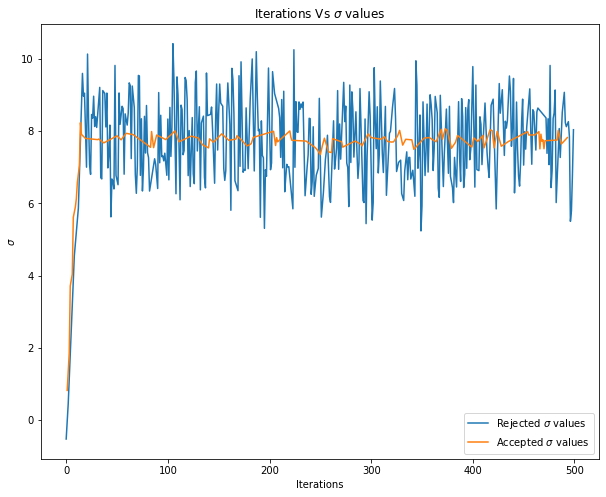

In [ ]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = Metropolis_Algorithm(log_like_fn, prior, transition_model_fn, [p,0.1], 500, np.random.normal(p, p/2, 1000), acceptance)
print('For First 500 Iterations :')
plt.figure(figsize=(10,8))
plt.plot(Iteration_Rejected, Rejected[:,1], label = r'Rejected $\sigma$ values')
plt.plot(Iteration_Accepted, Accepted[:,1], label = r'Accepted $\sigma$ values')
plt.legend()
plt.title(r'Iterations Vs $\sigma$ values')
plt.xlabel('Iterations')
plt.ylabel(r'$\sigma$')
plt.plot()

<ipython-input-7-675175af70c8>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))
<ipython-input-9-9c0c3f059c5c>:8: RuntimeWarning: divide by zero encountered in log
  if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:


For 50000 Iterations :


[]

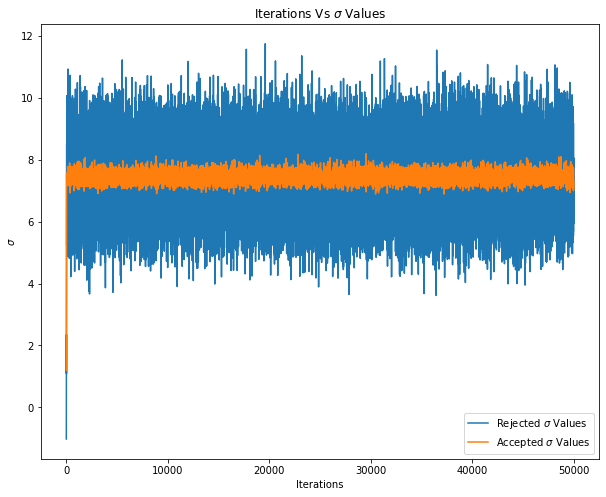

In [ ]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = Metropolis_Algorithm(log_like_fn, prior, transition_model_fn, [p,0.1], 50000, np.random.normal(p, p/2, 1000), acceptance)
print('For 50000 Iterations :')
plt.figure(figsize=(10,8))
plt.plot(Iteration_Rejected, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.plot(Iteration_Accepted, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Iterations Vs $\sigma$ Values')
plt.xlabel('Iterations')
plt.ylabel(r'$\sigma$')
plt.plot()

In [ ]:
New_Accepted = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values')
plt.show()

In [ ]:
def new_prior(theta):
  if theta[1] > 0:
    if p/2 <= theta[0] <= (p+(p/2)):
      return 1/p
    else:
      return 0
  else:
    return 0

def new_transition_model(theta):
  return np.random.multivariate_normal(theta, np.identity(2))

def new_log_likelihood(theta, D):
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
  
def new_acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    if np.random.uniform(0,1) < np.exp(theta_new - theta_current):
      return True
    else:
      return False

def New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_transition_model, Initial_State, Iterations, D, new_acceptance):
  theta = Initial_State
  Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = [], [], [], []
  for i in range(Iterations):
    theta_new = new_transition_model(theta)
    theta_lik = new_log_likelihood(theta, D)
    theta_new_lik = new_log_likelihood(theta_new, D) 
    if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      Iteration_Accepted.append(i)
    else:
      Rejected.append(theta_new) 
      Iteration_Rejected.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(Iteration_Accepted), np.array(Iteration_Rejected)

In [ ]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_transition_model, [p/2,0.1], 10000, np.random.normal(10, 3, 1000), new_acceptance)

New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_mu)
plt.title(r'Histogram of Last 75% Accepted $\mu$ values')
plt.show()

<ipython-input-13-d87983a621f5>:14: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
<ipython-input-13-d87983a621f5>:32: RuntimeWarning: divide by zero encountered in log
  if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:


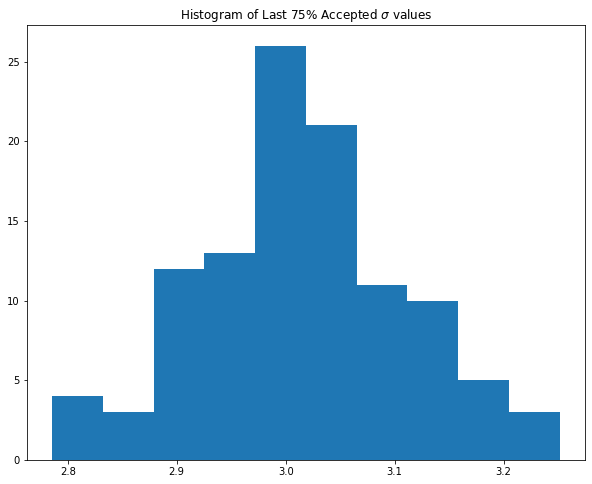

In [ ]:
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_sigma)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values')
plt.show()

<ipython-input-13-d87983a621f5>:32: RuntimeWarning: divide by zero encountered in log
  if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:


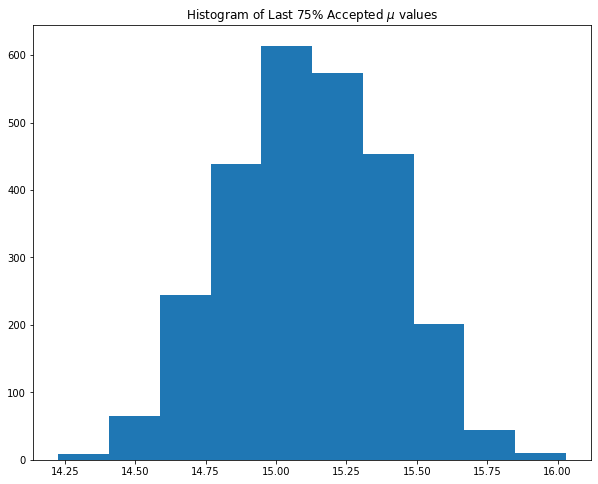

In [ ]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_transition_model, [p/2,0.1], 50000, np.random.normal(p, p/2, 1000), new_acceptance)

New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_mu)
plt.title(r'Histogram of Last 75% Accepted $\mu$ values')
plt.show()

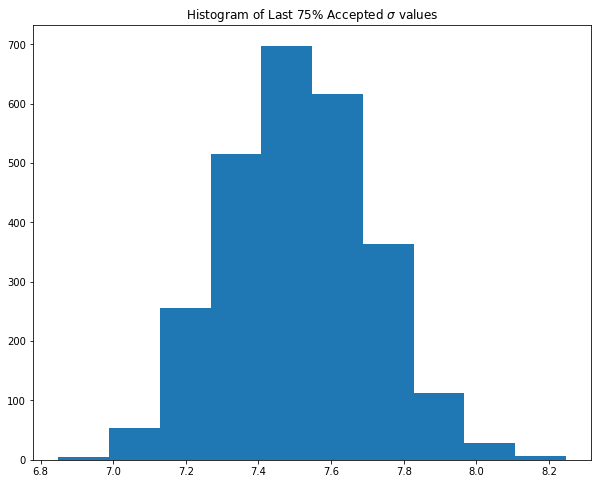

In [ ]:
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_sigma)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values')
plt.show()